#  Introduction
This lab called on us t find the best locations to open a liquors store. Using transactions from the state liqour distributor to stores.

In [39]:
#Importing Libraries
#Read file in using Store number as index for the transactions. That way i can look at each stores tranactions

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd           
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv') 
df.head(5)
index_col='Store Number'

## Cleaning and EDA

In [40]:
# Lets look at the names of Liqour being sold
#df['Category Name'].value_counts()

In [41]:
# Lets look at the types of liquor being sold
df['Category Name'].unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

NAN values represent missing data. Because dataset is so vast droping rows with NAN values wouldnt hurt.
Also I will covert date to datetime

In [42]:
#Replace $ signs Dollar Sales to nohting and converts values in columns to floats
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace("$", "").astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace("$", "").astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace("$", "").astype(float)

In [43]:
#Convert category#, Vendor#, Zipcode, Item#, to strings because # are representavie not numerical
df['Category'] = df['Category'].astype(str)
df['County Number'] = df['County Number'].astype(str)
df['Vendor Number'] = df['Vendor Number'].astype(str)
df['Zip Code'] = df['Zip Code'].astype(str)
df['Item Number'] = df['Item Number'].astype(str)

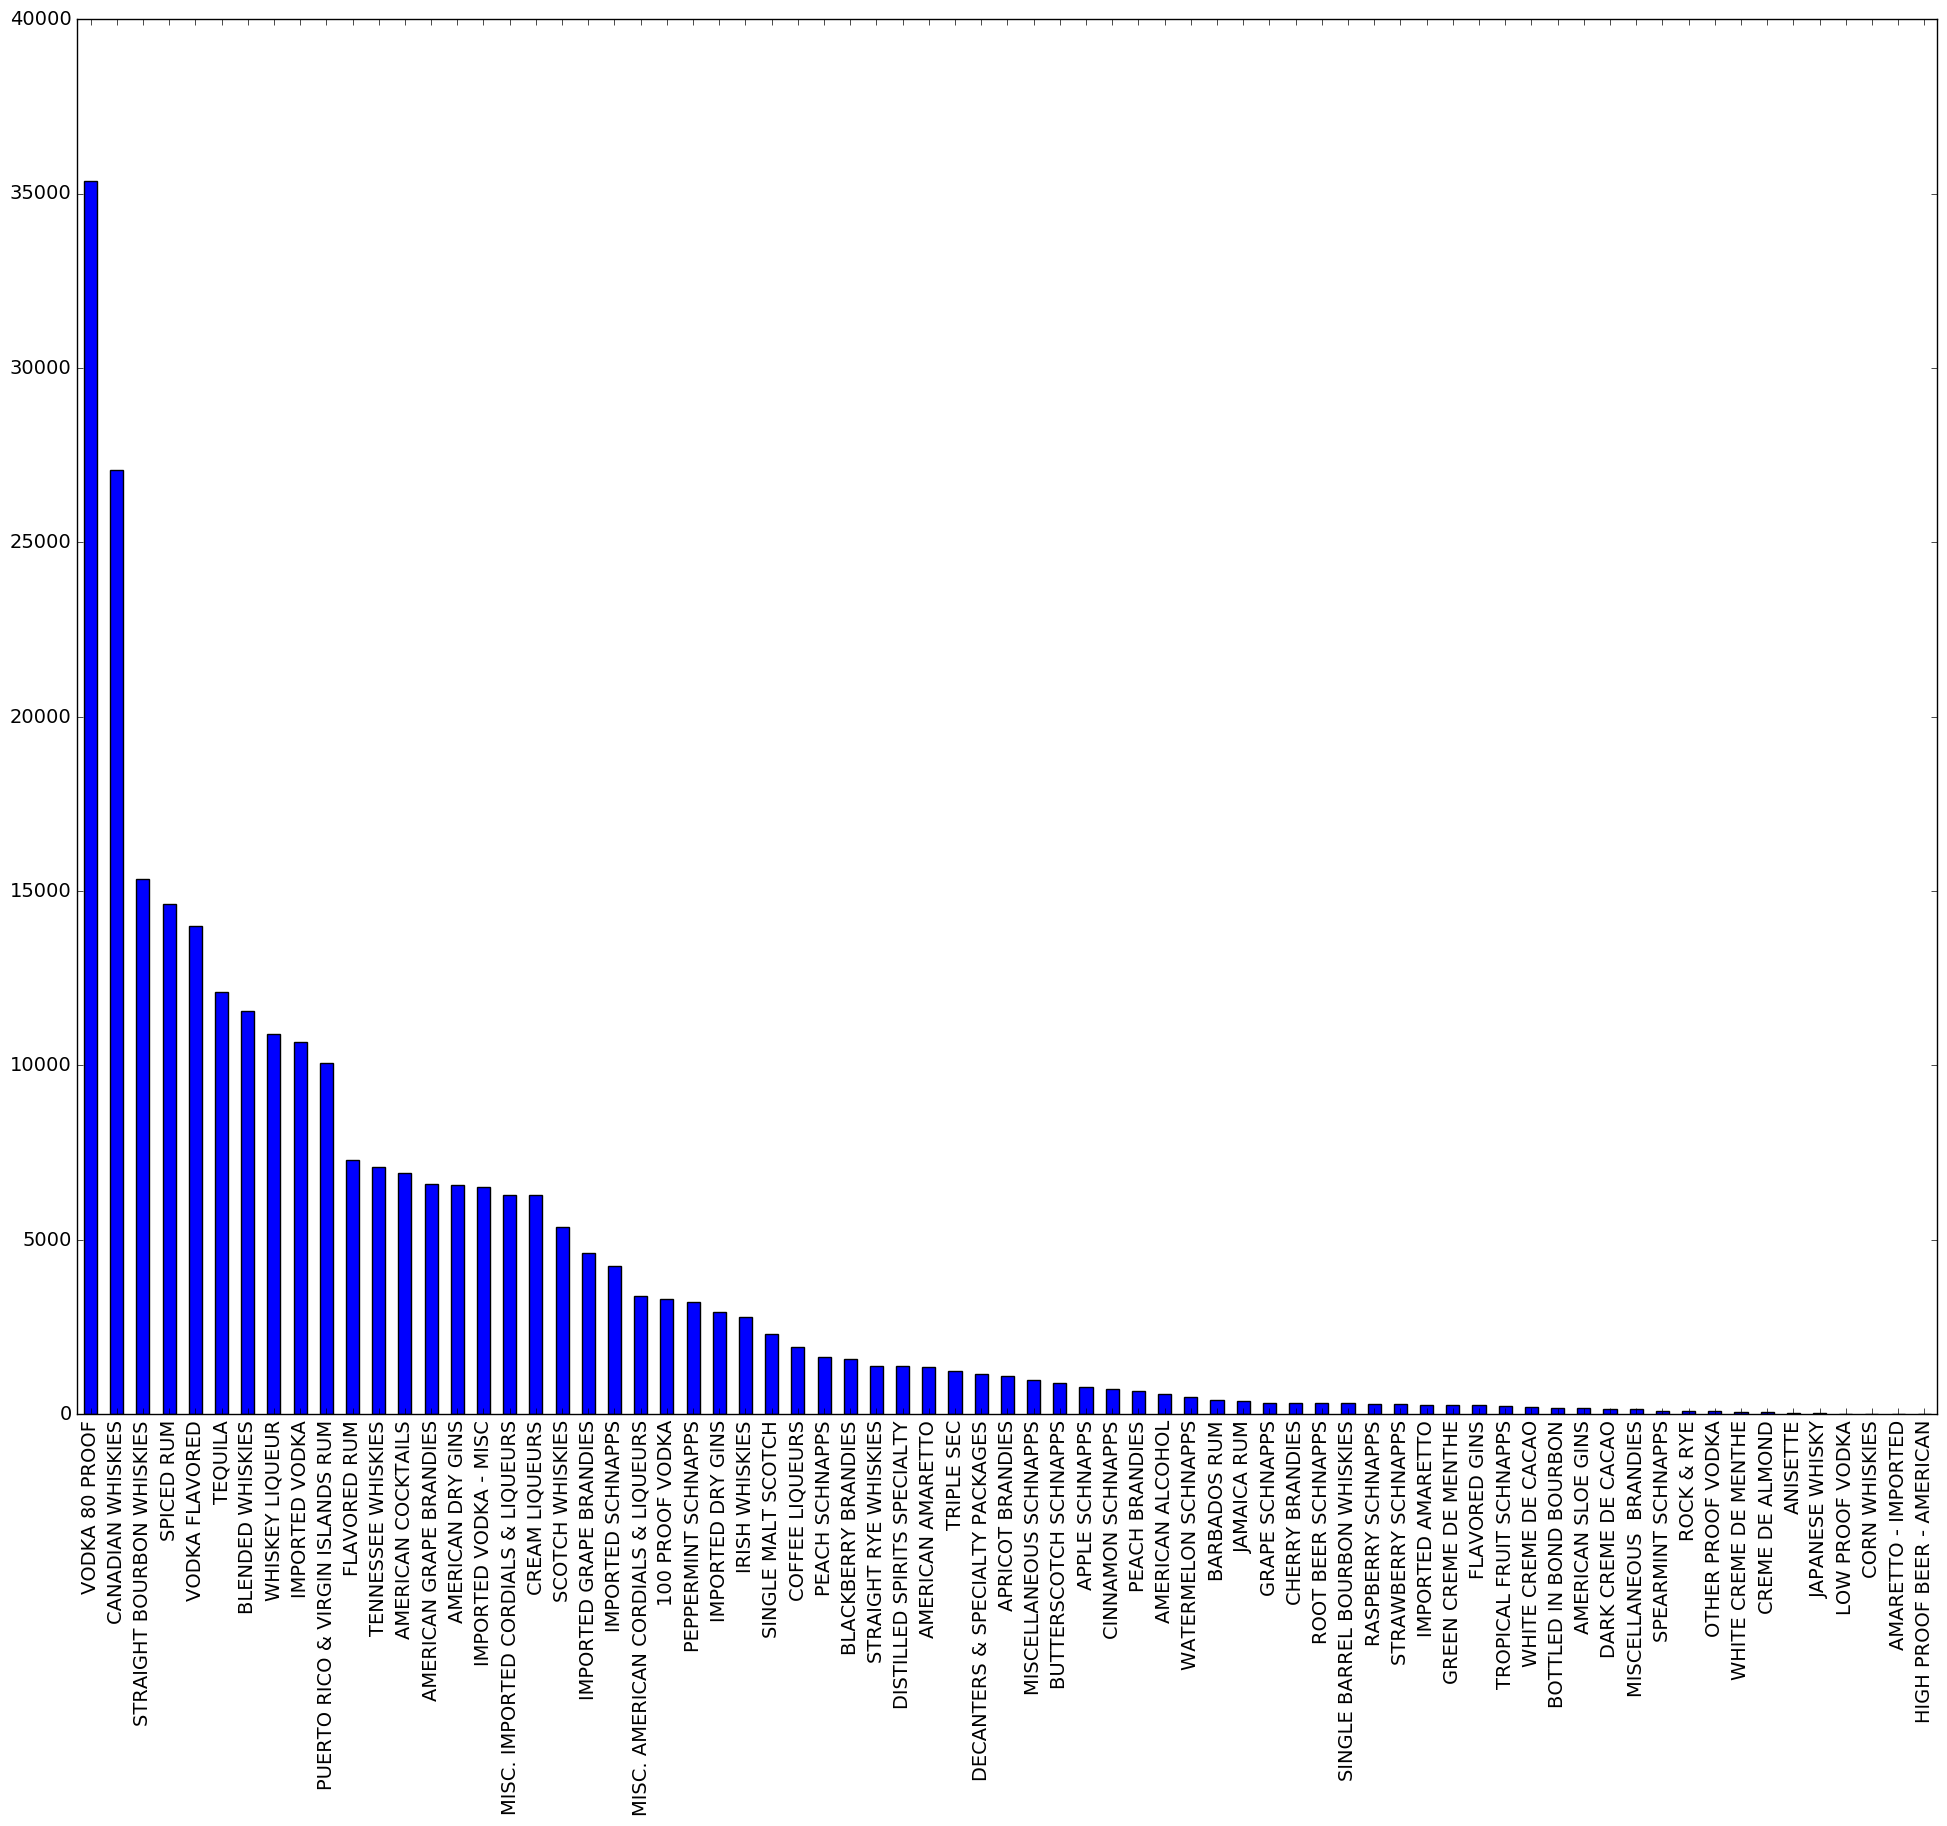

In [54]:
# Lets look at the types of liquor sold and which sells the most
#histogram of Liqours sorted 
plt.rcParams['figure.figsize'] = (24, 18)
plt.rcParams['font.size'] = 14
df['Category Name'].value_counts().plot(kind='bar')

Looks like Vodka and Canadian Wiskies sell way better than other types in the State of IOWA

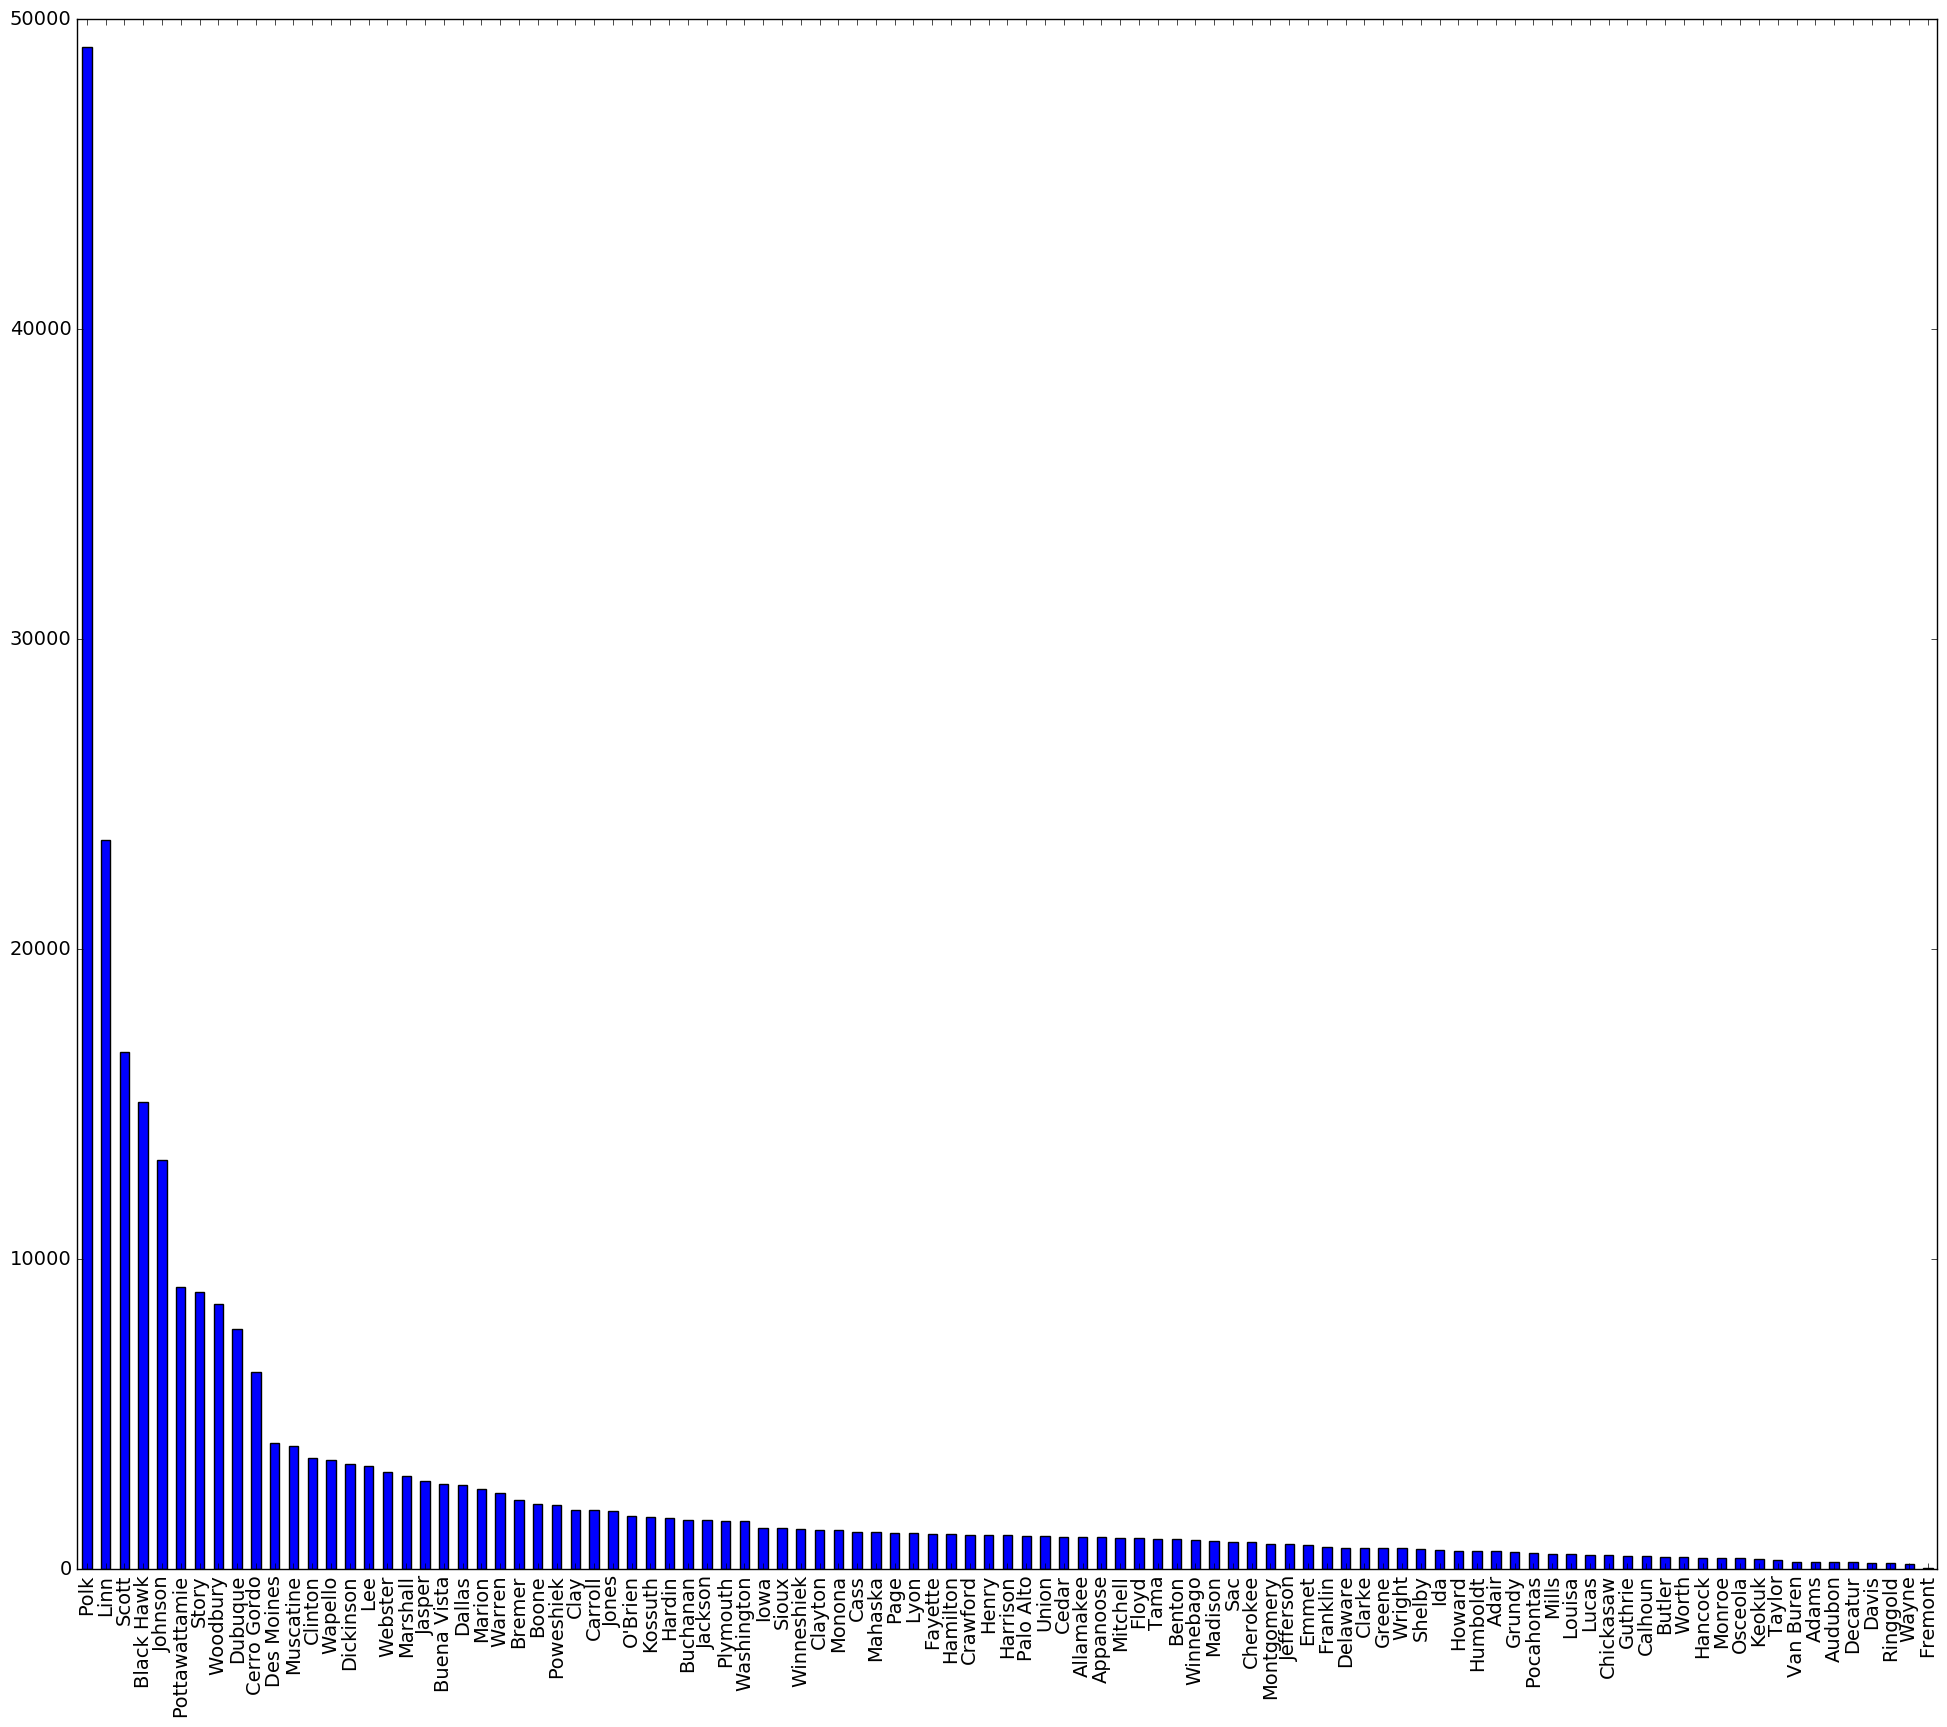

In [45]:
# Lets look at which Counties Buy the most alchol
plt.rcParams['figure.figsize'] = (24, 20)
plt.rcParams['font.size'] = 14
df['County'].value_counts().plot(kind='bar')

Polk County sells the most. Its my assumption that their large amounts of purchase correlates highly to demand.
So where ever sells more is going to have high demand which would be the best location.

In [46]:
#Volume Sold liters and Gallons are the same and have the same realtionship
#since we are intrested in Iowa and us measuremnts are in Gallons we should drop the liters 

In [47]:
top_county =df[df.County == 'Polk']

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79
10,09/28/2015,2648,WEST DES MOINES,50265,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,4.5,1.19
28,12/01/2015,4375,GRIMES,50111,77.0,Polk,1031080.0,VODKA 80 PROOF,380,37338,UV Vodka PET,1750,10.99,16.49,6,98.94,10.5,2.77
35,04/02/2015,2626,DES MOINES,50311,77.0,Polk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65254,Jagermeister Liqueur,375,6.52,9.78,4,39.12,1.5,0.40
36,04/20/2015,2532,DES MOINES,50317,77.0,Polk,1071100.0,AMERICAN COCKTAILS,285,56957,Bartenders Hot Sex,1000,5.28,7.92,12,95.04,12.0,3.17


In [48]:
#Polk is the top county in sales dollars

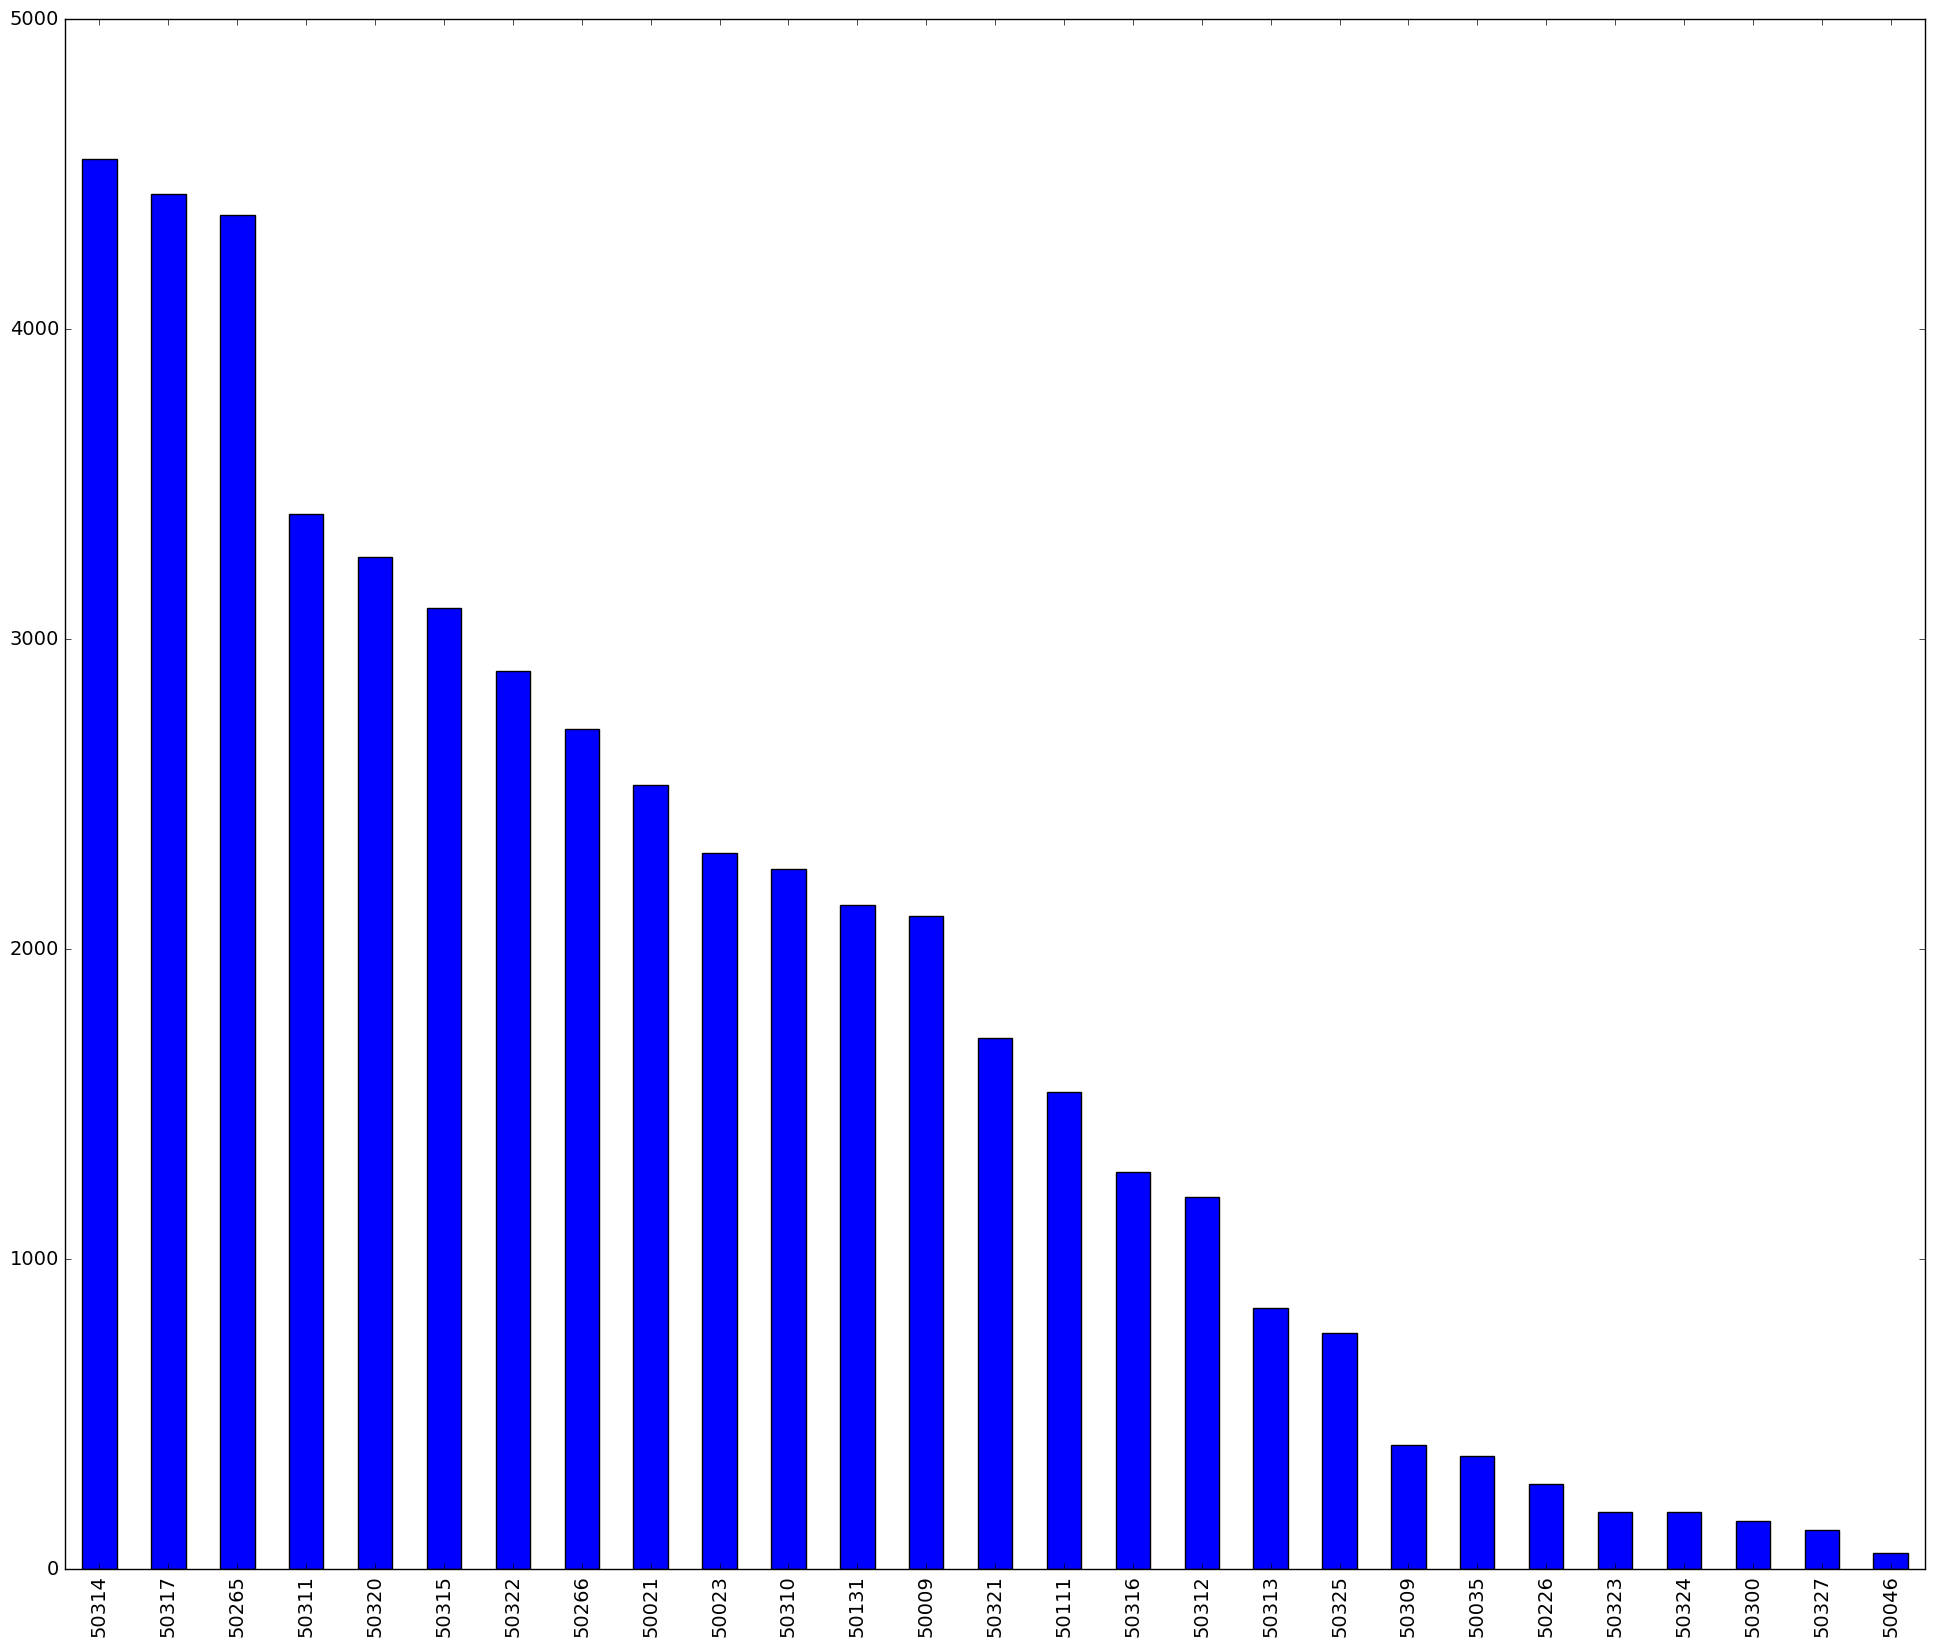

In [49]:
# Lets look into Zipcodes in Polk county
top_county['Zip Code'].value_counts().plot(kind='bar')

Zipcodes 50314, 50317, and 50265 are the top zip codes in sales dollars 

In [55]:
top_zipcode= top_county[top_county['Zip Code'] == '50314']

In [56]:
# Lets look at the top selling liquours in the top zipcode
top_zipcode['Item Description'].value_counts()

Paul Masson Grande Amber Brandy            61
Black Velvet                               51
Hawkeye Vodka                              50
Seagrams Extra Dry Gin                     46
Hennessy Vs Cognac                         43
Jose Cuervo Especial Reposado Tequila      41
Jagermeister Liqueur                       40
Hennessy VS                                38
Grey Goose Vodka                           37
Absolut Swedish Vodka 80 Prf               37
Fireball Cinnamon Whiskey                  37
Jameson                                    37
Crown Royal Canadian Whisky                37
Barton Vodka                               36
Beam's 8 Star Bl Whiskey                   34
Seagrams 7 Crown Bl Whiskey                33
Crown Royal Regal Apple                    32
Mccormick Vodka Pet                        31
Mccormick Vodka                            29
New Amsterdam Vodka                        27
Paramount Gin                              26
Jack Daniels Old #7 Black Lbl     

# Conclusion

After some analysis, we can detrmine the best county to open a location is polk and the best zipcodes are 50314, 50317 and 50265. After looking up the zipcodes they are all located in the captial area and have high populations relative to the state. So a store in any of the three zipcodes would provide a great location with traffic.